## colab路径设置

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
os.chdir('drive/My Drive/NLP')

In [4]:
!pwd

/content/drive/My Drive/NLP


#解压数据集并查看

In [ ]:
!unzip aclImdb_v1.zip

In [ ]:
cd /content/drive/My Drive/NLP/aclImdb_v1/train/pos

In [ ]:
!ls -l |grep "^-"|wc -l

12500


#导入训练集和测试集

## 统计数据集信息

###训练集记录文件目录

In [ ]:
import os
from os.path import isfile, join
import pandas as pd

train_pos_files = []    #训练集正面评价列表
train_neg_files = []    #训练集负面评价列表

file_names = []
name = ['file_names_train']

i = 0   #计数变量
for f in os.listdir('aclImdb_v1/train/pos/'):
  if isfile(join('aclImdb_v1/train/pos/', f)):
    i += 1  
    train_pos_files.append(join('aclImdb_v1/train/pos/', f))
print("训练集正面评价处理到第"+ str(i) + "个")

i = 0
for f in os.listdir('aclImdb_v1/train/neg/'):
  if isfile(join('aclImdb_v1/train/neg/', f)):
    i += 1 
    train_neg_files.append(join('aclImdb_v1/train/neg/', f))
print("训练集负面评价处理到第"+ str(i) + "个")

file_names = train_pos_files + train_neg_files
file_list = pd.DataFrame(columns = name, data = file_names)  #保存文件名
print(file_list)
file_list.to_csv('file_names.csv',encoding='utf-8')

训练集正面评价处理到第12500个
训练集负面评价处理到第12500个
                        file_names_train
0       aclImdb_v1/train/pos/11302_8.txt
1      aclImdb_v1/train/pos/11005_10.txt
2      aclImdb_v1/train/pos/11277_10.txt
3      aclImdb_v1/train/pos/10934_10.txt
4      aclImdb_v1/train/pos/11272_10.txt
...                                  ...
24995     aclImdb_v1/train/neg/593_1.txt
24996     aclImdb_v1/train/neg/682_3.txt
24997     aclImdb_v1/train/neg/591_4.txt
24998     aclImdb_v1/train/neg/400_2.txt
24999     aclImdb_v1/train/neg/319_1.txt

[25000 rows x 1 columns]


###测试集记录文件目录

In [ ]:
import os
from os.path import isfile, join
import pandas as pd

test_pos_files = []    #测试集正面评价列表
test_neg_files = []    #测试集负面评价列表

file_names = []
name = ['file_names_test']

i = 0   #计数变量
#pdb.set_trace()
for f in os.listdir('aclImdb_v1/test/pos/'):
  if isfile(join('aclImdb_v1/test/pos/', f)):
    i += 1  
    test_pos_files.append(join('aclImdb_v1/test/pos/', f))
print("测试集正面评价处理到第"+ str(i) + "个")

i = 0
#pdb.set_trace()
for f in os.listdir('aclImdb_v1/test/neg/'):
  if isfile(join('aclImdb_v1/test/neg/', f)):
    i += 1 
    test_neg_files.append(join('aclImdb_v1/test/neg/', f))
print("测试集负面评价处理到第"+ str(i) + "个")

file_names = test_pos_files + test_neg_files
file_list = pd.DataFrame(columns = name, data = file_names)  #保存文件名
print(file_list)
file_list.to_csv('file_names_test.csv',encoding='utf-8')

测试集正面评价处理到第12500个
测试集负面评价处理到第12500个
                        file_names_test
0      aclImdb_v1/test/pos/10880_10.txt
1      aclImdb_v1/test/pos/11116_10.txt
2       aclImdb_v1/test/pos/11485_9.txt
3       aclImdb_v1/test/pos/11467_7.txt
4      aclImdb_v1/test/pos/11552_10.txt
...                                 ...
24995     aclImdb_v1/test/neg/510_2.txt
24996     aclImdb_v1/test/neg/516_1.txt
24997     aclImdb_v1/test/neg/511_3.txt
24998     aclImdb_v1/test/neg/533_1.txt
24999     aclImdb_v1/test/neg/575_4.txt

[25000 rows x 1 columns]


##读取文件目录

In [ ]:
file_names_train = open('file_names_train.csv',encoding='utf-8')# 读取训练集所有文件名
file_names_test = open('file_names_test.csv',encoding='utf-8')# 读取测试集所有文件名

context = file_names_train.read()   #读取所有内容
list_result = context.split("\n")#  以回车符\n分割成单独的行
length=len(list_result)
file_names_train = [] #重新定义为文件名列表

for i in range(length - 1):
  list_result[i] = list_result[i].split(",")
  if i != 0:
    file_names_train.append(list_result[i][1])
print(len(file_names_train))
print(file_names_train[24999])

context = file_names_test.read()   #读取所有内容
list_result = context.split("\n")#  以回车符\n分割成单独的行
length=len(list_result)
file_names_test = [] #重新定义为文件名列表

for i in range(length - 1):
  list_result[i] = list_result[i].split(",")
  if i != 0:
    file_names_test.append(list_result[i][1])
print(len(file_names_test))
print(file_names_test[24999])

25000
aclImdb_v1/train/neg/319_1.txt
25000
aclImdb_v1/test/neg/575_4.txt


##读取文件内容

###训练集

In [ ]:
import pdb
import numpy as np
import pandas as pd

all_files = [] #记录所有内容
all_labels = [1 for _ in range(12500)] + [0 for _ in range(12500)] #记录所有标签
num_words = [] #记录总词数
dict_words = set([])#记录词典大小
num_files = 0 #记录有多少文件
    
for f in file_names_train:
  with open(f, "r", encoding='utf-8') as f:
    line = f.read()
    line = line.replace("<br />", " ")    #替换掉特殊符号
    line = line.replace(".", ". ")    #增加空格
    line = line.replace("(", " ")    #替换掉左括号
    line = line.replace(")", " ")    #替换掉右括号
    line = line.replace("\"", " ")    #替换掉引号
    line = line.replace("\'", " ")    #替换掉引号
    line = line.replace("  ", " ")    #多个空格替换为一个空格
    all_files.append(line)    #记录内容
    sent_tmp = line.split()   #记录每个词的数组
    counter = len(sent_tmp)   #记录一共多少个词
    num_words.append(counter)   #读入词数数组
    for word in sent_tmp:    #读取进字典
      dict_words.add(word)
  num_files += 1
  print("处理完第" + str(num_files) +"个文档")
  if num_files == 12500:
    break
        
print('读取12500篇正向评价文档完毕')
    
print('文件总数', num_files)
print('所有的词的数量', sum(num_words))
print('词典大小', len(dict_words))
print('平均文件词的长度', sum(num_words) / len(num_words))

  #pdb.set_trace()
name = ['file_contents']
file_contents = pd.DataFrame(columns = name, data = all_files)  #保存文件内容
file_contents.to_csv('file_contents.csv',encoding='utf-8')

X_orig = np.array(all_files)    #建立x、y变量
print("X_orig:",X_orig.shape)
np.save("X_orig_1.npy",X_orig)

In [ ]:
num_files = 0 #记录有多少文件
for f in file_names_train:
  if num_files < 12500:
    num_files += 1
    continue
  with open(f, "r", encoding='utf-8') as f:
    line = f.read()
    line = line.replace("<br />", " ")    #替换掉换行符
    line = line.replace(".", ". ")    #增加空格
    line = line.replace("(", " ")    #替换掉左括号
    line = line.replace(")", " ")    #替换掉右括号
    line = line.replace("\"", " ")    #替换掉引号
    line = line.replace("\'", " ")    #替换掉引号
    line = line.replace("  ", " ")    #替换为一个空格
    all_files.append(line)    #记录内容
    sent_tmp = line.split()   #记录每个词的数组
    counter = len(sent_tmp)   #记录一共多少个词
    num_words.append(counter)   #读入词数数组
    for word in sent_tmp:    #读取进字典
      dict_words.add(word)
  num_files += 1
  print("处理完第" + str(num_files) +"个文档")
        
print('读取12500篇负向评价文档完毕')
    
print('文件总数', num_files)
print('所有的词的数量', sum(num_words))
print('词典大小', len(dict_words))
print('平均文件词的长度', sum(num_words) / len(num_words))

#pdb.set_trace()
name = ['file_contents']
file_contents = pd.DataFrame(columns = name, data = all_files)  #保存文件内容
file_contents.to_csv('file_contents.csv',mode='a',encoding='utf-8')

name = ['file_labels']
file_labels = pd.DataFrame(columns = name, data = all_labels)  #保存文件标签
file_labels.to_csv('file_labels.csv',encoding='utf-8')

X_orig = np.array(all_files)    #建立x、y变量
Y_orig = np.array(all_labels)
print("X_orig:",X_orig.shape)
print("Y_orig:",Y_orig.shape)
np.save("X_orig.npy",X_orig)
np.save("Y_orig.npy",Y_orig)

In [ ]:
print(type(num_words))
name = ['num_words']
file_num_words = pd.DataFrame(columns = name, data = num_words)  #保存文档词数统计
file_num_words.to_csv('num_words.csv',encoding='utf-8')

<class 'list'>


In [ ]:
print("文档 "+ file_names[0] + " 的内容是:\n" + X_orig[0])

文档 aclImdb_v1/train/pos/12334_7.txt 的内容是:
Does anyone happen to know where this film was shot? The aviation scene on the cliff is beautiful. It appears to be England. However, Ivy s apartment building certainly looks like the Brill Building, with its fascinating elevators.  Charles Mendl is listed as playing Sir Charles Gage . Maybe I blinked, but I never saw him. Perhaps he was the husband s lawyer, but, again, I don t recall that character being in the film, other than being mentioned as having made a phone call. Perhaps he was in the aviation scene? Or the ballroom scene? Did anyone spot him? Herbert Marshall was 57 years old when he shot this film. 


In [ ]:
print("文档 "+ file_names[24999] + " 的内容是:\n" + X_orig[24999])

文档 aclImdb_v1/train/neg/319_1.txt 的内容是:
A friend of mine bought this film for £1, and even then it was grossly overpriced. Despite featuring big names such as Adam Sandler, Billy Bob Thornton and the incredibly talented Burt Young, this film was about as funny as taking a chisel and hammering it straight through your earhole. It uses tired, bottom of the barrel comedic techniques - consistently breaking the fourth wall as Sandler talks to the audience, and seemingly pointless montages of hot girls .  Adam Sandler plays a waiter on a cruise ship who wants to make it as a successful comedian in order to become successful with women. When the ship s resident comedian - the shamelessly named Dickie due to his unfathomable success with the opposite gender - is presumed lost at sea, Sandler s character Shecker gets his big break. Dickie is not dead, he s rather locked in the bathroom, presumably sea sick.  Perhaps from his mouth he just vomited the worst film of all time. 


### 统计结果可视化（只有训练集）

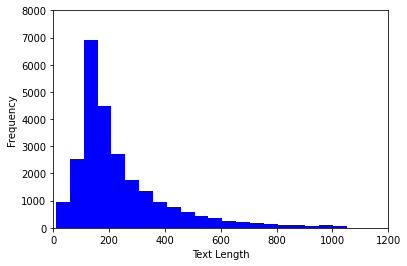

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(num_words, 50, facecolor='b')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.axis([0, 1200, 0, 8000])
plt.show()

###测试集

In [ ]:
import pdb
import numpy as np
import pandas as pd
all_files = [] #记录所有内容
all_labels = [1 for _ in range(12500)] + [0 for _ in range(12500)]
    
num_files = 0
#pdb.set_trace()
for f in file_names_test:
  with open(f, "r", encoding='utf-8') as f:
    line = f.read()
    line = line.replace("<br />", " ")    #替换掉特殊符号
    line = line.replace(".", ". ")    #增加空格
    line = line.replace("(", " ")    #替换掉左括号
    line = line.replace(")", " ")    #替换掉右括号
    line = line.replace("\"", " ")    #替换掉引号
    line = line.replace("\'", " ")    #替换掉引号
    line = line.replace("  ", " ")    #多个空格替换为一个空格
    all_files.append(line)    #记录内容
  num_files += 1
  if num_files % 3000 == 0:
    print("处理完第" + str(num_files) +"个文档")
  if num_files == 12500:
    break
        
print('读取12500篇正向评价文档完毕')

#pdb.set_trace()
name = ['file_contents']
file_contents = pd.DataFrame(columns = name, data = all_files)  #保存文件内容
file_contents.to_csv('file_contents_test.csv',encoding='utf-8')

X_Test_All = np.array(all_files)    #建立x、y变量
print("X_Test_All:",X_Test_All.shape)
np.save("X_Test_All_1.npy",X_Test_All)

In [ ]:
import numpy as np
all_files = np.load('X_Test_All_1.npy')
print(all_files.shape)
all_files = all_files.tolist()

(12500,)


In [ ]:
import pdb
import numpy as np
import pandas as pd
if __name__ == "__main__":
  num_files = 0
  all_files = [] #记录所有内容
  all_labels = [1 for _ in range(12500)] + [0 for _ in range(12500)]
  #pdb.set_trace()
  for f in file_names_test:
    if num_files < 12500:
      num_files += 1
      continue
    #pdb.set_trace()
    with open(f, "r", encoding='utf-8') as f:
      line = f.read()
      line = line.replace("<br />", " ")    #替换掉换行符
      line = line.replace(".", ". ")    #增加空格
      line = line.replace("(", " ")    #替换掉左括号
      line = line.replace(")", " ")    #替换掉右括号
      line = line.replace("\"", " ")    #替换掉引号
      line = line.replace("\'", " ")    #替换掉引号
      line = line.replace("  ", " ")    #替换为一个空格
      all_files.append(line)    #记录内容
    num_files += 1
    if num_files % 3000 == 0:
      print("处理完第" + str(num_files) +"个文档")
          
  print('读取12500篇负向评价文档完毕')
      
  #pdb.set_trace()
  name = ['file_contents']
  file_contents = pd.DataFrame(columns = name, data = all_files)  #保存文件内容
  file_contents.to_csv('file_contents_test.csv',mode='a',encoding='utf-8')

  name = ['file_labels']
  file_labels = pd.DataFrame(columns = name, data = all_labels)  #保存文件标签
  file_labels.to_csv('file_labels_test.csv',encoding='utf-8')

  X_Test_All = np.array(all_files)    #建立x、y变量
  Y_Test_All = np.array(all_labels)
  print("X_Test_All:",X_Test_All.shape)
  print("Y_Test_All:",Y_Test_All.shape)
  np.save("X_Test_All_2.npy",X_Test_All)
  np.save("Y_Test_All.npy",Y_Test_All)

In [ ]:
X_Test_All_1 = np.load("X_Test_All_1.npy")
X_Test_All_2 = np.load("X_Test_All_2.npy")
print(X_Test_All_1[0])
print(X_Test_All_1[0])
X_Test_All = np.hstack((X_Test_All_1,X_Test_All_2))
print(X_Test_All.shape)
print(X_Test_All[12500])
np.save("X_Test_All.npy",X_Test_All)

# 数据集预处理

##数据集导入

In [5]:
import numpy as np
import pandas as pd
X_orig = np.load("X_orig.npy")
Y_orig = np.load("Y_orig.npy")
print("X_orig:",X_orig.shape)
print("Y_orig:",Y_orig.shape)
print("文档的内容是:\n" + X_orig[0])
print("对应标签为:\n" + str(Y_orig[0]))
print("文档的内容是:\n" + X_orig[24999])
print("对应标签为:\n" + str(Y_orig[24999]))

X_orig: (25000,)
Y_orig: (25000,)
文档的内容是:
Does anyone happen to know where this film was shot? The aviation scene on the cliff is beautiful. It appears to be England. However, Ivy s apartment building certainly looks like the Brill Building, with its fascinating elevators.  Charles Mendl is listed as playing Sir Charles Gage . Maybe I blinked, but I never saw him. Perhaps he was the husband s lawyer, but, again, I don t recall that character being in the film, other than being mentioned as having made a phone call. Perhaps he was in the aviation scene? Or the ballroom scene? Did anyone spot him? Herbert Marshall was 57 years old when he shot this film. 
对应标签为:
1
文档的内容是:
A friend of mine bought this film for £1, and even then it was grossly overpriced. Despite featuring big names such as Adam Sandler, Billy Bob Thornton and the incredibly talented Burt Young, this film was about as funny as taking a chisel and hammering it straight through your earhole. It uses tired, bottom of the barr

In [ ]:
f = open('train_input.txt','w')
[rows, ] = X_orig.shape
for i in range(rows):
  if i != 0:
    f.write('\n')
  X_orig[i] = X_orig[i].replace('\t', ' ')
  f.write(str(Y_orig[i]) + '\t' + str(X_orig[i]))
  if (i + 1) % 3000 == 0:
    print("处理到第" + str(i + 1) + "个文档")

f.close()

处理到第3000个文档
处理到第6000个文档
处理到第9000个文档
处理到第12000个文档
处理到第15000个文档
处理到第18000个文档
处理到第21000个文档
处理到第24000个文档


In [ ]:
import numpy as np

X_Test_All = np.load("X_Test_All.npy")
Y_Test_All = np.load("Y_Test_All.npy")
print("X_Test_All:",X_Test_All.shape)
print("Y_Test_All:",Y_Test_All.shape)
print("文档的内容是:\n" + X_Test_All[0])
print("对应标签为:\n" + str(Y_Test_All[0]))
print("文档的内容是:\n" + X_Test_All[24999])
print("对应标签为:\n" + str(Y_Test_All[24999]))

X_Test_All: (25000,)
Y_Test_All: (25000,)
文档的内容是:
This is my favorite game for the Nintendo 64 platform. I ve played many different first-person shooters, and I ve never really liked any of them much, but this game has a certain something that I can t put my finger on that makes it an amazing amount of fun. Maybe it s the extraordinary detail put into the game. Maybe it s the fluid movement of the characters. Maybe it s the gadgets and weapons. Maybe it s the suave character of James Bond. Whatever it is, this game never seems to get old no matter how many times I ve played it. 
对应标签为:
1
文档的内容是:
First of all, Blythe Danner doesn t look anywhere NEAR old enough to play Capshaw s daughter and in fact she isn t -- only ten years apart .  I understand this is supposed to be one of those magical, Moonstruck type supernatural romances but this is beyond the pale. Very, very weak in terms of acting, script and direction.  The only one who really shines here is Ellen DeGeneres, who makes this 

In [ ]:
f = open('test_input.txt','w')
[rows, ] = X_Test_All.shape
for i in range(rows):
  if i != 0:
    f.write('\n')
  X_Test_All[i] = X_Test_All[i].replace('\t', ' ')
  f.write(str(Y_Test_All[i]) + '\t' + str(X_Test_All[i]))
  if (i + 1) % 3000 == 0:
    print("处理到第" + str(i + 1) + "个文档")

f.close()

处理到第3000个文档
处理到第6000个文档
处理到第9000个文档
处理到第12000个文档
处理到第15000个文档
处理到第18000个文档
处理到第21000个文档
处理到第24000个文档


## 创建字典准备

In [6]:
from gensim.models import KeyedVectors
from keras.layers.core import Dense, Dropout, SpatialDropout1D
from keras.layers.convolutional import Conv1D
from keras.layers.embeddings import Embedding
from keras.layers.pooling import GlobalMaxPooling1D
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import collections
import matplotlib.pyplot as plt
import nltk
import numpy as np
nltk.download('punkt')

np.random.seed(42)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
EMBED_SIZE = 300    #嵌入层输出向量大小
NUM_FILTERS = 256 
NUM_WORDS = 12    #卷积的词数
BATCH_SIZE = 64  #送入网络的记录的数量  
NUM_EPOCHS = 5   #重复次数
VOCAB_SIZE = 20000 #考虑文档中前20000个高频词

In [52]:
counter = collections.Counter()   #构造词索引列表

fin = open('train_input.txt', "rb")
maxlen = 0
i = 0

for line in fin:    #读取文件，词典计数
    _, content = line.decode().strip().split("\t")
    words = [x.lower() for x in nltk.word_tokenize(content)] #分词
    if len(words) > maxlen:   #输入最长的一条到嵌入层
        maxlen = len(words)
    for word in words:
        counter[word] += 1    #词典进行计数
    i += 1
    if i % 3000 == 0:
      print("处理到完第" + str(i) + "个文档")

fin.close()

word2index = collections.defaultdict(int)
for wid, word in enumerate(counter.most_common(VOCAB_SIZE)):
    word2index[word[0]] = wid + 1   #词典相对应word2index里面保存着词典从高频到低频的次的顺序
VOCAB_SIZE = len(word2index) + 1  #词典大小，加上一个不属于词典的词的索引

处理到完第3000个文档
处理到完第6000个文档
处理到完第9000个文档
处理到完第12000个文档
处理到完第15000个文档
处理到完第18000个文档
处理到完第21000个文档
处理到完第24000个文档


## 读取文件，根据词典数字化

In [ ]:
xs, ys, xt, yt = [], [], [], [] #对应训练集和测试集的数据

#训练集
fin = open('train_input.txt', "rb")
i = 0
for line in fin:
  label, content = line.decode().strip().split("\t")
  ys.append(int(label))
  words = [x.lower() for x in nltk.word_tokenize(content)] 
  wids = [word2index[word] for word in words] #从词典中得到每个词的
  xs.append(wids)
  i += 1
  if i % 3000 == 0:
    print("处理到第" + str(i) + "个文档")
fin.close()

#测试集
fin = open('test_input.txt', "rb")
i = 0
for line in fin:
  label, content = line.decode().strip().split("\t")
  yt.append(int(label))
  words = [x.lower() for x in nltk.word_tokenize(content)] 
  wids = [word2index[word] for word in words] #从词典中得到每个词的
  xt.append(wids)
  i += 1
  if i % 3000 == 0:
    print("处理到第" + str(i) + "个文档")
fin.close()

X = pad_sequences(xs, maxlen=maxlen)
Y = np_utils.to_categorical(ys)
X_Test = pad_sequences(xt, maxlen=maxlen)
Y_Test = np_utils.to_categorical(yt)

处理到第3000个文档
处理到第6000个文档
处理到第9000个文档
处理到第12000个文档
处理到第15000个文档
处理到第18000个文档
处理到第21000个文档
处理到第24000个文档
处理到第3000个文档
处理到第6000个文档
处理到第9000个文档
处理到第12000个文档
处理到第15000个文档
处理到第18000个文档
处理到第21000个文档
处理到第24000个文档


In [ ]:
np.save('X.npy', X)
np.save('Y.npy', Y)
np.save('X_Test.npy', X_Test)
np.save('Y_Test.npy', Y_Test)

In [8]:
X = np.load('X.npy')
Y = np.load('Y.npy')
X_Test = np.load('X_Test.npy')
Y_Test = np.load('Y_Test.npy')

## 导入词向量

In [ ]:
# load word2vec model
word2vec = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
embedding_weights = np.zeros((VOCAB_SIZE, EMBED_SIZE))
for word, index in word2index.items():
    try:
        embedding_weights[index, :] = word2vec[word]
    except KeyError:
        pass
np.save("embedding_weights.npy",embedding_weights)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [9]:
embedding_weights = np.load("embedding_weights.npy")

## 独热编码（简单神经网络输入）

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
onehot_x = vectorize_sequences(X, VOCAB_SIZE)
onehot_test = vectorize_sequences(X_Test, VOCAB_SIZE)

In [11]:
print(onehot_x.shape)
print(onehot_test.shape)
print(onehot_x[0])
print(Y.shape)

(25000, 20001)
(25000, 20001)
[1. 1. 1. ... 0. 0. 0.]
(25000, 2)


##TF-IDF表示（表示方法）

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
tfidf_matrix = tfidf_vec.fit_transform(X_orig)
tfidf = tfidf_matrix.toarray()
print(tfidf_vec.vocabulary_['and'])
print(tfidf_matrix.shape)
print(tfidf[0])

3258
(25000, 74849)
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
i = 0
for item in tfidf[1]:
  if item != 0:
    print("第"+ str(i + 1) + "个数字不为0，是" +str(item))
  i += 1

In [8]:
#转化为稠密矩阵
deleK = 0
tfidf_del_zero = []
for row in tfidf:
  row = filter(lambda x: x != deleK, row)
  row = [i for i in row]
  tfidf_del_zero.append(row)

In [10]:
#获得最长的长度
print(tfidf_del_zero[0])
maxlen = 0
num_len = []
row_length = len(tfidf_del_zero)
for i in range(row_length):
  col_length = len(tfidf_del_zero[i])
  num_len.append(col_length)
  if col_length > maxlen:
    maxlen = col_length
print(maxlen)

[0.17764154191109852, 0.06248345924262586, 0.13862094858494095, 0.11425788250574999, 0.09199088121713944, 0.0591572376013053, 0.35886032438593646, 0.1595030037243799, 0.03226983861248099, 0.07455093430699969, 0.1069949368618109, 0.19188999019870673, 0.19563782232809127, 0.21684570183968, 0.05466067678908415, 0.08975349022712813, 0.08125261887818565, 0.05428818767288333, 0.21915394254336928, 0.13468317788101403, 0.05465202311229119, 0.05556146284004292, 0.04828881051103579, 0.1759961707502937, 0.1133373033501834, 0.10755537344097449, 0.09767466756774168, 0.16613798705441485, 0.08780077561372464, 0.07046108659483605, 0.11599024516912486, 0.1500195078213602, 0.10624249101998916, 0.06448696636964603, 0.09177950490028472, 0.04629482193839849, 0.04557919579028193, 0.022920166214210825, 0.05282277691805431, 0.1617477224626855, 0.05455293629971536, 0.12314937111940762, 0.036203705946260684, 0.13013862967029804, 0.0724660088883863, 0.048659720437030526, 0.14323100498998934, 0.07268288077155763,

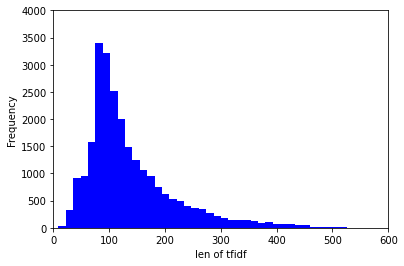

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(num_len, 50, facecolor='b')
plt.xlabel('len of tfidf')
plt.ylabel('Frequency')
plt.axis([0, 600, 0, 4000])
plt.show()

In [12]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 300
print("Start padding......")
tfidf_pad = pad_sequences(tfidf_del_zero, maxlen = maxlen, dtype='float', padding = 'post')
print("Finished!")

Start padding......
Finished!


In [13]:
tfidf_pad.shape

(25000, 300)

In [14]:
np.save('tfidf_pad.npy', tfidf_pad)

#各种数据进行callback记录

In [12]:
from keras.callbacks import Callback
from sklearn.metrics import f1_score, recall_score, precision_score

class Metrics(Callback):
    def __init__(self, val_data, val_label):
        super().__init__()
        self.validation_data = val_data #记录验证集
        self.validation_label = val_label #记录验证集
        
    def on_train_begin(self, logs={}):    #在训练前记录
        print("on train begin", len(self.validation_data))    #输出验证集大小
        print()
        self.val_f1s = [] #记录验证机的F1参数
        self.val_recalls = []   #记录验证机的召回率
        self.val_precisions = []    #记录验证机的精确度

    def on_epoch_end(self, epoch, logs={}):   #在每一个epoch结束的时候
        print()
        print("on epoch end :", len(self.validation_data))    #结束的时候输出此时验证集的大小
        print()
        data_num = len(self.validation_data) ## 等于所有数据 / batchsize，所以所有数据需要能够整除

        val_pred = model.predict(self.validation_data)    #验证集正确
        val_true = self.validation_label
        val_pred_flat = np.zeros(data_num)    #验证集预测
        val_true_flat = np.zeros(data_num)    #验证集正确

        for data_count in range(data_num):
            val_pred_flat[data_count] = np.argmax(val_pred[data_count])
            val_true_flat[data_count] = np.argmax(Y_Test[data_count])
            if data_count % 1000 == 0:
              print("处理完第" + str(data_count+1) + "个验证集")
        print()
        
        _val_f1 = f1_score(val_true_flat, val_pred_flat, average='macro')
        _val_recall = recall_score(val_true_flat, val_pred_flat, average='macro')
        _val_precision = precision_score(val_true_flat, val_pred_flat, average='macro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        print('— val_f1: %f — val_precision: %f — val_recall %f' %(_val_f1, _val_precision, _val_recall))
        print(' — val_f1:' ,_val_f1)
        return

# 画混淆矩阵

In [13]:
import itertools
def paintConfusionMatrix(cfmatrix, classes, filename):
    plt.figure(figsize=(15,10))   #大小
    plt.imshow(cfmatrix,interpolation='nearest',cmap=plt.cm.Blues)
    plt.title('confusion matrix')

    tick_marks=np.arange(len(classes))    
    plt.xticks(tick_marks,classes,rotation=90,size=18)
    plt.yticks(tick_marks,classes,size=18)
    plt.xlabel('Pred label',size=20)
    plt.ylabel('True label',size=20)
    fmt='.2f' 
    thresh=cfmatrix.max()/2.
    for i,j in itertools.product(range(cfmatrix.shape[0]),range(cfmatrix.shape[1])):
        plt.text(j, i, format(cfmatrix[i, j], fmt), horizontalalignment="center", color="white" if cfmatrix[i, j] > thresh else "black",size = 22)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

#测试结果

##预处理

In [66]:
x_pos = 'Here\'s one of the more pleasingly scuzzy 70\'s blaxploitation grindhouse items; it\'s a pervasively low-rent pimp opus which comes across like a sleazier version of "The Mack." John Daniels, the studly womanizing hairdresser hero Mr. Jonathan in the immortal "Black Shampoo," gives an excellent steely portrayal of the Baron, a ruthless, business savvy, forever on the make all-powerful flesh peddler who much to the dismay of his bitter, brutal Italian rivals reigns supreme over the Sunset Strip. When not locking horns with his fellow no-count criminal pals or doing his best to avoid being busted by the local vice cops, Daniels is leading a sweetly average existence as your standard garden-variety suburbanite dude (complete with caring wife and loving kids!) in some typically humdrum California small town.<br /><br />The glaringly absurd premise alone promises top-rate trashy greatness of a decidedly Grade B schlock picture variety (George Theakos deserves kudos for his hilariously ludicrous script). Matt Cimber\'s commendably tactless and tasteless direction delivers the junky goods by the slimy bucketful, thus making this film a hugely enjoyable serving of celluloid grime. Among the assorted squalid delights to be savored herein are plentiful gratuitous female nudity, coarse dialogue, beautifully gaudy Me Decade threads (halter tops, felt hats, sparkling Day-Glo jewelry, loud seersucker suits), an intensely funky R&B score by Smoke, some hopelessly pathetic acting (the little old lady who lives next door to Daniels is excruciatingly shrill), a memorably nasty turn by Patrick Wright as a sadistic goon, a couple of cool action set pieces (the climactic slow motion barroom massacre seriously cooks), more lurid travelogue footage of the Sunset Strip than you can shake a feather boa at (said footage allegedly includes "the actual hookers and blades of the Sunset Strip in Hollywood"), effectively dark\'n\'dingy cinematography by Ken Gibb, a few sicko sexual fetish tableaux, some raw explicit violence (a prostitute has one of her breasts cut off!), and amusing supporting performances by familiar schlock feature perennials Richard Kennedy and George "Buck" Flower as a pair of racist, corrupt, browbeating police detectives. Sure, this movie ain\'t art, but it\'s certainly artless enough to qualify as a deliciously grungy chunk of entertainingly sordid cinematic swill.'
y_pos = 1
x_neg = 'Enter the Ninja (1981) was the first of several "Ninja" films produced by Cannon starring or co-starring Japanese sensation Sho Kosugi. But the star of the first "Ninja" film was legendary tough guy Franco Nero. Sadly not even Mr. Nero or Sho Kosugi couldn\'t make this film watchable. When you have two bad dudes in an action film and it\'s neither watchable or fun, somethings amiss. But I digress. Skip this chapter and watch the next films in the series. They\'re more interesting and a whole lot of fun.<br /><br />Next is Revenge of the Ninja. Instead of playing the "evil oriental" (I use that term tongue in cheek mind you). He\'s the star! Strange for a western film. Watch that one instead.<br /><br />Not recommended except for die hard Sho Kosugi fans or Cannon film buffs.'
y_neg = 0

def deal_with_test(line):
  line = line.replace("<br />", " ")    #替换掉特殊符号
  line = line.replace(".", ". ")    #增加空格
  line = line.replace("(", " ")    #替换掉左括号
  line = line.replace(")", " ")    #替换掉右括号
  line = line.replace("\"", " ")    #替换掉引号
  line = line.replace("\'", " ")    #替换掉引号
  line = line.replace("  ", " ")    #多个空格替换为一个空格
  return line

def encode(line):
  words = [x.lower() for x in nltk.word_tokenize(line)] 
  wids = [word2index[word] for word in words] #从词典中得到每个词的
  return wids


x_pos = deal_with_test(x_pos)
x_pos = encode(x_pos)
print(x_pos)
y_pos = np_utils.to_categorical(y_pos)

x_neg = deal_with_test(x_neg)
x_neg = encode(x_neg)
print(x_neg)
y_neg = np_utils.to_categorical(y_neg)

[130, 14, 31, 6, 1, 55, 0, 0, 1337, 14, 10030, 11522, 5293, 112, 9, 14, 5, 0, 11830, 11065, 10100, 65, 268, 627, 41, 5, 0, 315, 6, 1, 8141, 2, 303, 5448, 3, 1, 0, 12147, 19985, 619, 575, 4302, 10, 1, 6457, 334, 0, 3, 401, 37, 322, 18545, 1111, 6, 1, 7274, 3, 5, 4268, 3, 963, 12670, 3, 1402, 23, 1, 102, 0, 2350, 0, 38, 79, 7, 1, 13507, 6, 28, 3069, 3, 1728, 1140, 8065, 0, 7446, 135, 1, 7619, 3521, 2, 56, 25, 18837, 12249, 18, 28, 1470, 0, 1644, 9220, 44, 395, 28, 122, 7, 773, 116, 10441, 36, 1, 699, 5409, 1760, 3, 5448, 8, 952, 5, 13245, 860, 2034, 16, 133, 1278, 0, 0, 2668, 584, 18, 2859, 323, 4, 1898, 351, 32, 10, 52, 3423, 12722, 2547, 398, 505, 2, 1, 18056, 1710, 844, 577, 4901, 0, 4340, 5041, 6, 5, 6478, 1464, 1001, 5721, 433, 2515, 708, 0, 983, 3476, 17, 28, 4816, 2750, 232, 2, 2213, 0, 14, 0, 0, 4, 5433, 460, 1501, 1, 0, 6607, 36, 1, 5716, 0, 3, 1308, 256, 12, 21, 5, 6135, 722, 5906, 6, 4185, 0, 2, 769, 1, 10862, 0, 12435, 7, 30, 0, 11468, 27, 12084, 2130, 659, 991, 3, 9984, 414,

##简单神经网络

In [64]:
x_pos = np.asarray(x_pos)
x_pos = x_pos[np.newaxis, :]
onehot_x_pos = vectorize_sequences(x_pos, VOCAB_SIZE)
print(onehot_x_pos.shape)
x_neg = np.asarray(x_neg)
x_neg = x_neg[np.newaxis, :]
onehot_x_neg = vectorize_sequences(x_neg, VOCAB_SIZE)
print(onehot_x_neg.shape)

(1, 20001)
(1, 20001)


In [45]:
from keras.models import load_model
model = load_model('model1.h5')

In [65]:
val_x_pos = model.predict(onehot_x_pos)
val_x_neg = model.predict(onehot_x_neg)
print("x_pos:", end = " ")
print(val_x_pos)
print("x_neg:", end = " ")
print(val_x_neg)

x_pos: [[0.32274503 0.677255  ]]
x_neg: [[0.6020305  0.39796945]]


##卷积神经网络

In [70]:
print(x_pos.shape)
print(x_neg.shape)

(408,)
(153,)


In [78]:
x_pos = np.asarray(x_pos)
x_neg = np.asarray(x_neg)
x_zero_pos = np.zeros(2732 - len(x_pos))
x_zero_neg = np.zeros(2732 - len(x_neg))
x_pos = np.hstack((x_zero_pos,x_pos))
x_neg = np.hstack((x_zero_neg,x_neg))
x_pos = x_pos[np.newaxis, :]
x_neg = x_neg[np.newaxis, :]
print(x_pos)
print(x_neg)

[[   0.    0.    0. ... 1321.    0.    2.]]
[[0.000e+00 0.000e+00 0.000e+00 ... 2.100e+01 4.444e+03 2.000e+00]]


In [79]:
from keras.models import load_model
model = load_model('model2.h5')

In [80]:
val_x_pos = model.predict(x_pos)
val_x_neg = model.predict(x_neg)
print("x_pos:", end = " ")
print(val_x_pos)
print("x_neg:", end = " ")
print(val_x_neg)

x_pos: [[0.10579075 0.8942092 ]]
x_neg: [[0.9141326  0.08586746]]


##LSTM

In [81]:
from keras.models import load_model
model = load_model('model3.h5')

In [83]:
val_x_pos = model.predict(x_pos)
val_x_neg = model.predict(x_neg)
print("x_pos:", end = " ")
print(val_x_pos)
print("x_neg:", end = " ")
print(val_x_neg)

x_pos: [[0.97034657 0.02965348]]
x_neg: [[0.54922986 0.45077014]]


# 简单神经网络

##划分数据集

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(onehot_x, Y, test_size=0.3072, random_state=42)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(17320, 20001) (7680, 20001) (17320, 2) (7680, 2)


##搭建模型

In [15]:
from keras import models
from keras.layers import Dense, Dropout
from keras import regularizers

model = models.Sequential()
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(VOCAB_SIZE,)))
model.add(Dropout(0.4))
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(2, activation="softmax"))

In [16]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                320032    
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 320,338
Trainable params: 320,338
Non-trainable params: 0
_________________________________________________________________


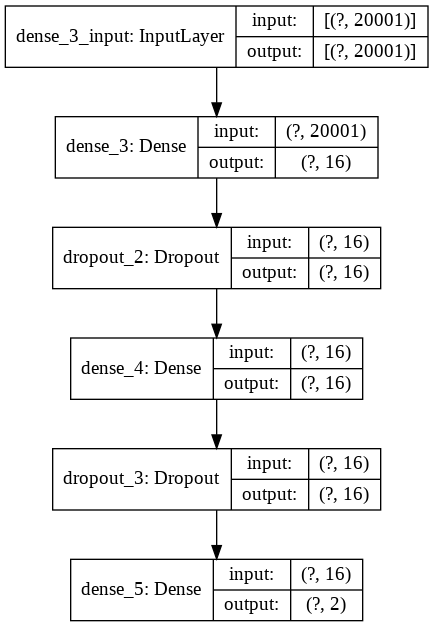

In [ ]:
import keras
keras.utils.plot_model(
    model,
    to_file='model1.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
)

In [17]:
myMetrics = Metrics(onehot_test, Y_Test)
history = model.fit(Xtrain, Ytrain, callbacks = [myMetrics], epochs=5, batch_size=512, validation_data=(Xtest, Ytest))

on train begin 25000

Epoch 1/5
31/34 [==========================>...] - ETA: 0s - loss: 0.6363 - binary_accuracy: 0.6719
on epoch end : 25000

处理完第1个验证集
处理完第1001个验证集
处理完第2001个验证集
处理完第3001个验证集
处理完第4001个验证集
处理完第5001个验证集
处理完第6001个验证集
处理完第7001个验证集
处理完第8001个验证集
处理完第9001个验证集
处理完第10001个验证集
处理完第11001个验证集
处理完第12001个验证集
处理完第13001个验证集
处理完第14001个验证集
处理完第15001个验证集
处理完第16001个验证集
处理完第17001个验证集
处理完第18001个验证集
处理完第19001个验证集
处理完第20001个验证集
处理完第21001个验证集
处理完第22001个验证集
处理完第23001个验证集
处理完第24001个验证集

— val_f1: 0.862024 — val_precision: 0.862665 — val_recall 0.862080
 — val_f1: 0.8620243673418683
34/34 [==============================] - 3s 97ms/step - loss: 0.6278 - binary_accuracy: 0.6806 - val_loss: 0.4712 - val_binary_accuracy: 0.8699
Epoch 2/5
33/34 [============================>.] - ETA: 0s - loss: 0.4697 - binary_accuracy: 0.8224
on epoch end : 25000

处理完第1个验证集
处理完第1001个验证集
处理完第2001个验证集
处理完第3001个验证集
处理完第4001个验证集
处理完第5001个验证集
处理完第6001个验证集
处理完第7001个验证集
处理完第8001个验证集
处理完第9001个验证集
处理完第10001个验证集
处理完第11001个验证集


##准确率和loss值

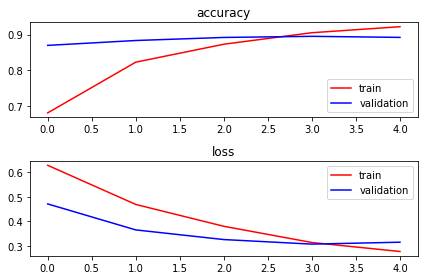

240/240 [==============================] - 1s 3ms/step - loss: 0.3160 - binary_accuracy: 0.8923
Test loss: 0.316, accuracy: 0.892


In [18]:
# plot loss function
plt.subplot(211)
plt.title("accuracy")
plt.plot(history.history["binary_accuracy"], color="r", label="train")
plt.plot(history.history["val_binary_accuracy"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

# evaluate model
score = model.evaluate(Xtest, Ytest, verbose=1)
print("Test loss: {:.3f}, accuracy: {:.3f}".format(score[0], score[1]))

##精确度、召回率、f1分数

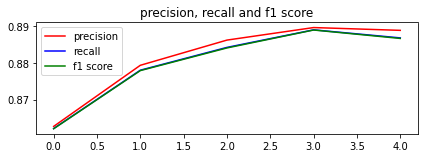

In [19]:
# plot loss function
plt.subplot(211)
plt.title("precision, recall and f1 score")
plt.plot(myMetrics.val_precisions, color="r", label="precision")
plt.plot(myMetrics.val_recalls, color="b", label="recall")
plt.plot(myMetrics.val_f1s, color="g", label="f1 score")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

##混淆矩阵

In [20]:
classes=['positive', 'negtive']
filename1 = "nn_confusion_matrix_1.jpg"
filename2 = "nn_confusion_matrix_2.jpg"

— val_f1: 0.886730 — val_precision: 0.888941 — val_recall 0.886880


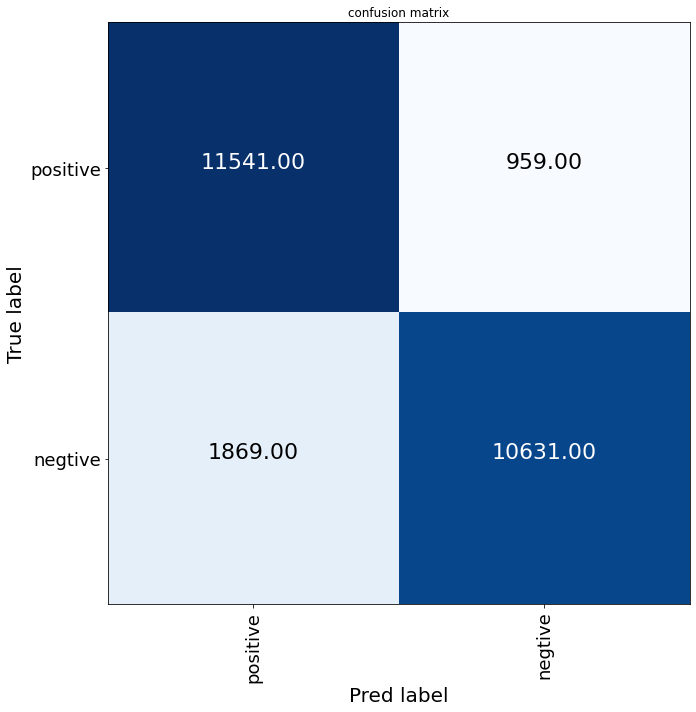

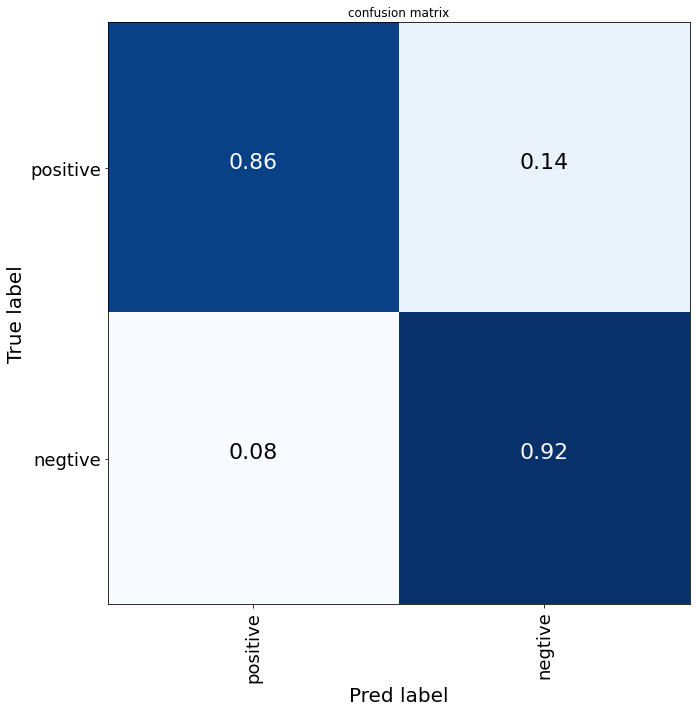

In [21]:
from sklearn.metrics import confusion_matrix

data_num = len(onehot_test) ## 等于所有数据 / batchsize，所以所有数据需要能够整除
val_pred = model.predict(onehot_test)    #验证集正确
val_true = Y_Test
val_pred_flat = np.zeros(data_num)    #验证集预测
val_true_flat = np.zeros(data_num)    #验证集正确
for data_count in range(data_num):
    val_pred_flat[data_count] = np.argmax(val_pred[data_count])
    val_true_flat[data_count] = np.argmax(Y_Test[data_count])

val_f1 = f1_score(val_true_flat, val_pred_flat, average='macro')  #3个数值
val_recall = recall_score(val_true_flat, val_pred_flat, average='macro')  #3个数值
val_precision = precision_score(val_true_flat, val_pred_flat, average='macro')  #3个数值
print('— val_f1: %f — val_precision: %f — val_recall %f' %(val_f1, val_precision, val_recall))

conf_matrix_1 = [[0,0],[0,0]]
tn, fp, fn, tp = confusion_matrix(val_true_flat, val_pred_flat).ravel()
conf_matrix_1[0][0] = tp.item()
conf_matrix_1[0][1] = fn.item()
conf_matrix_1[1][0] = fp.item()
conf_matrix_1[1][1] = tn.item()
conf_matrix_1 = np.asarray(conf_matrix_1)
paintConfusionMatrix(conf_matrix_1, classes, filename1)
conf_matrix_2 = [[0,0],[0,0]]
nn, npp, pn, pp = 0, 0, 0, 0
n_num, p_num = 0, 0
for data_count in range(data_num):
    if val_pred_flat[data_count] == 0 and val_true_flat[data_count] == 0:
      nn += 1
      n_num += 1
    elif val_pred_flat[data_count] == 0 and val_true_flat[data_count] == 1:
      npp += 1
      n_num += 1
    elif val_pred_flat[data_count] == 1 and val_true_flat[data_count] == 0:
      pn += 1
      p_num += 1
    elif val_pred_flat[data_count] == 1 and val_true_flat[data_count] == 1:
      pp += 1
      p_num += 1
nn, npp, pn, pp = nn / n_num, npp / n_num, pn / p_num, pp / p_num
#pdb.set_trace()
conf_matrix_2[0][0] = pp
conf_matrix_2[0][1] = pn
conf_matrix_2[1][0] = npp
conf_matrix_2[1][1] = nn
conf_matrix_2 = np.asarray(conf_matrix_2)
paintConfusionMatrix(conf_matrix_2, classes, filename2)

In [22]:
model.save('model1.h5')

#卷积神经网络

##划分数据集

In [23]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3072, random_state=42)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
maxlen = Xtrain.shape[1]

(17320, 2732) (7680, 2732) (17320, 2) (7680, 2)


In [ ]:
Xtest

array([[   0,    0,    0, ...,    1,  206,  290],
       [   0,    0,    0, ...,   81,  766,   51],
       [   0,    0,    0, ...,   16,   78,    2],
       ...,
       [   0,    0,    0, ...,  155, 1359,    2],
       [   0,    0,    0, ...,    1,  186,    2],
       [   0,    0,    0, ...,   14,    0,   32]], dtype=int32)

In [ ]:
Ytest

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

##建立模型

In [24]:
model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=maxlen, weights=[embedding_weights], trainable=True))
model.add(SpatialDropout1D(0.4))
model.add(Conv1D(filters=NUM_FILTERS, kernel_size=NUM_WORDS, activation="relu"))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2732, 300)         6000300   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 2732, 300)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 2721, 256)         921856    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 6,922,670
Trainable params: 6,922,670
Non-trainable params: 0
____________________________________________

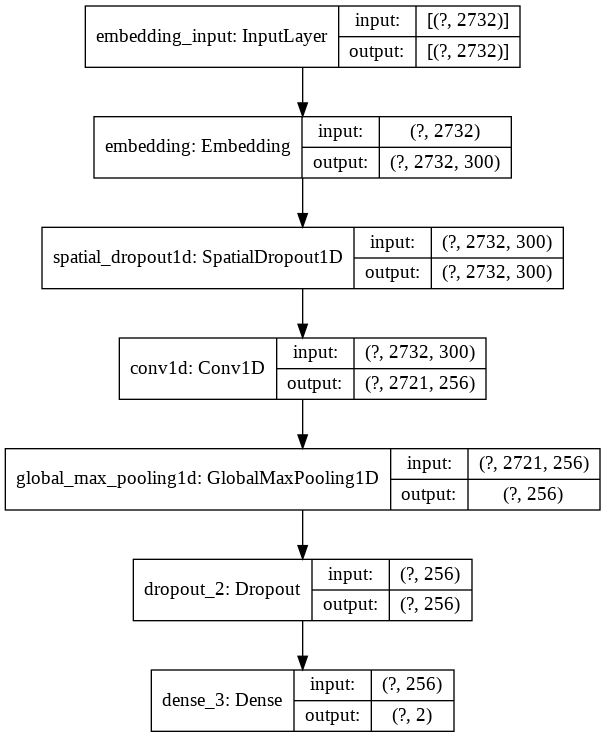

In [36]:
import keras
keras.utils.plot_model(
    model,
    to_file='model2.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
)

In [25]:
myMetrics = Metrics(X_Test, Y_Test)
history = model.fit(Xtrain, Ytrain, callbacks = [myMetrics], batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(Xtest, Ytest))  

on train begin 25000

Epoch 1/5
271/271 [==============================] - ETA: 0s - loss: 0.4267 - accuracy: 0.7904
on epoch end : 25000

处理完第1个验证集
处理完第1001个验证集
处理完第2001个验证集
处理完第3001个验证集
处理完第4001个验证集
处理完第5001个验证集
处理完第6001个验证集
处理完第7001个验证集
处理完第8001个验证集
处理完第9001个验证集
处理完第10001个验证集
处理完第11001个验证集
处理完第12001个验证集
处理完第13001个验证集
处理完第14001个验证集
处理完第15001个验证集
处理完第16001个验证集
处理完第17001个验证集
处理完第18001个验证集
处理完第19001个验证集
处理完第20001个验证集
处理完第21001个验证集
处理完第22001个验证集
处理完第23001个验证集
处理完第24001个验证集

— val_f1: 0.854093 — val_precision: 0.870462 — val_recall 0.855560
 — val_f1: 0.8540927452066694
271/271 [==============================] - 75s 277ms/step - loss: 0.4267 - accuracy: 0.7904 - val_loss: 0.3293 - val_accuracy: 0.8578
Epoch 2/5
271/271 [==============================] - ETA: 0s - loss: 0.2230 - accuracy: 0.9102
on epoch end : 25000

处理完第1个验证集
处理完第1001个验证集
处理完第2001个验证集
处理完第3001个验证集
处理完第4001个验证集
处理完第5001个验证集
处理完第6001个验证集
处理完第7001个验证集
处理完第8001个验证集
处理完第9001个验证集
处理完第10001个验证集
处理完第11001个验证集
处理完第12001个验证集
处理完第13

## 准确率和loss值

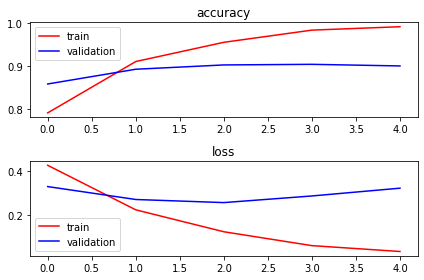

240/240 [==============================] - 6s 26ms/step - loss: 0.3221 - accuracy: 0.8999
Test loss: 0.322, accuracy: 0.900


In [26]:
# plot loss function
plt.subplot(211)
plt.title("accuracy")
plt.plot(history.history["accuracy"], color="r", label="train")
plt.plot(history.history["val_accuracy"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

# evaluate model
score = model.evaluate(Xtest, Ytest, verbose=1)
print("Test loss: {:.3f}, accuracy: {:.3f}".format(score[0], score[1]))


##精确度、召回率、f1分数

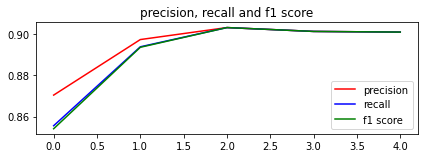

In [27]:
# plot loss function
plt.subplot(211)
plt.title("precision, recall and f1 score")
plt.plot(myMetrics.val_precisions, color="r", label="precision")
plt.plot(myMetrics.val_recalls, color="b", label="recall")
plt.plot(myMetrics.val_f1s, color="g", label="f1 score")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

##混淆矩阵

In [1]:
classes=['positive', 'negtive']
filename1 = "cnn_confusion_matrix_1.jpg"
filename2 = "cnn_confusion_matrix_2.jpg"

— val_f1: 0.901120 — val_precision: 0.901127 — val_recall 0.901120


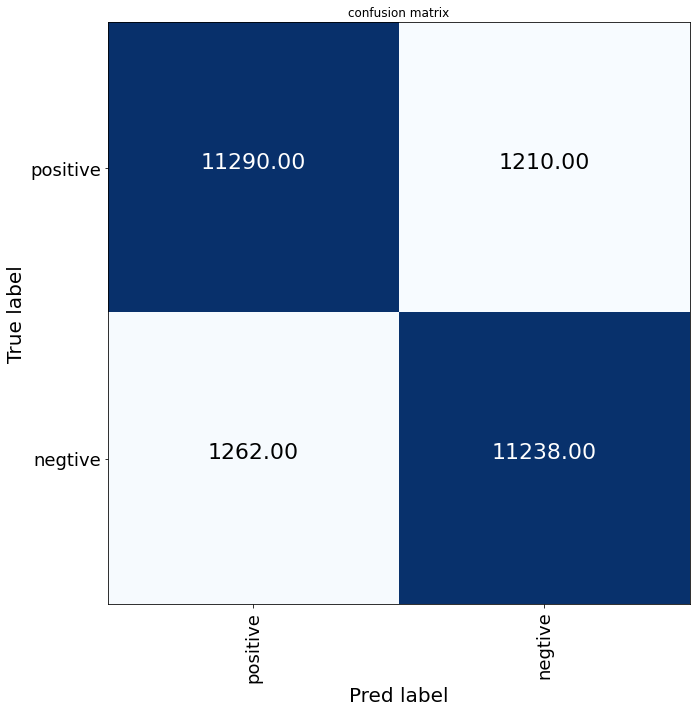

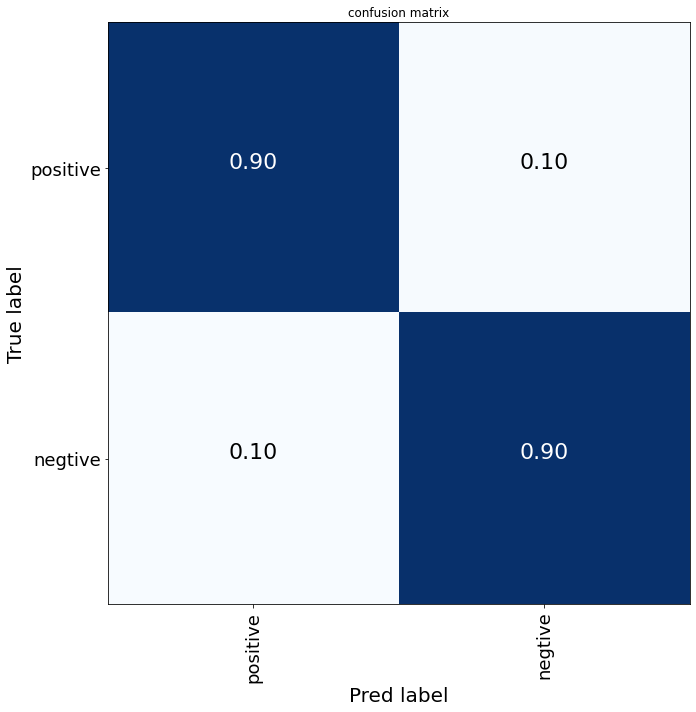

In [28]:
from sklearn.metrics import confusion_matrix

data_num = len(X_Test) ## 等于所有数据 / batchsize，所以所有数据需要能够整除
val_pred = model.predict(X_Test)    #验证集正确
val_true = Y_Test
val_pred_flat = np.zeros(data_num)    #验证集预测
val_true_flat = np.zeros(data_num)    #验证集正确
for data_count in range(data_num):
    val_pred_flat[data_count] = np.argmax(val_pred[data_count])
    val_true_flat[data_count] = np.argmax(Y_Test[data_count])

val_f1 = f1_score(val_true_flat, val_pred_flat, average='macro')  #3个数值
val_recall = recall_score(val_true_flat, val_pred_flat, average='macro')  #3个数值
val_precision = precision_score(val_true_flat, val_pred_flat, average='macro')  #3个数值
print('— val_f1: %f — val_precision: %f — val_recall %f' %(val_f1, val_precision, val_recall))

conf_matrix_1 = [[0,0],[0,0]]
tn, fp, fn, tp = confusion_matrix(val_true_flat, val_pred_flat).ravel()
conf_matrix_1[0][0] = tp.item()
conf_matrix_1[0][1] = fn.item()
conf_matrix_1[1][0] = fp.item()
conf_matrix_1[1][1] = tn.item()
conf_matrix_1 = np.asarray(conf_matrix_1)
paintConfusionMatrix(conf_matrix_1, classes, filename1)
conf_matrix_2 = [[0,0],[0,0]]
nn, npp, pn, pp = 0, 0, 0, 0
n_num, p_num = 0, 0
for data_count in range(data_num):
    if val_pred_flat[data_count] == 0 and val_true_flat[data_count] == 0:
      nn += 1
      n_num += 1
    elif val_pred_flat[data_count] == 0 and val_true_flat[data_count] == 1:
      npp += 1
      n_num += 1
    elif val_pred_flat[data_count] == 1 and val_true_flat[data_count] == 0:
      pn += 1
      p_num += 1
    elif val_pred_flat[data_count] == 1 and val_true_flat[data_count] == 1:
      pp += 1
      p_num += 1
nn, npp, pn, pp = nn / n_num, npp / n_num, pn / p_num, pp / p_num
#pdb.set_trace()
conf_matrix_2[0][0] = pp
conf_matrix_2[0][1] = pn
conf_matrix_2[1][0] = npp
conf_matrix_2[1][1] = nn
conf_matrix_2 = np.asarray(conf_matrix_2)
paintConfusionMatrix(conf_matrix_2, classes, filename2)

In [29]:
model.save('model2.h5')  

#LSTM模型搭建

##划分数据集

In [31]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(20000, 2732) (5000, 2732) (20000, 2) (5000, 2)


##搭建模型

In [32]:
import keras
from keras.models import Sequential,Model
from keras.layers.core import SpatialDropout1D
from keras.layers import Input,Dense,GRU,LSTM,Activation,Dropout,Embedding

model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=maxlen, weights=[embedding_weights], trainable=True))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2732, 300)         6000300   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 2732, 300)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               219648    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 6,220,206
Trainable params: 6,220,206
Non-trainable params: 0
_________________________________________________________________


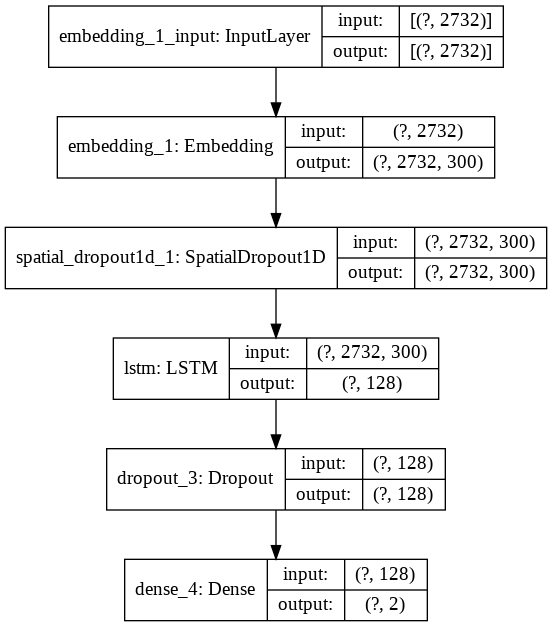

In [33]:
import keras
keras.utils.plot_model(
    model,
    to_file='model3.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
)

In [84]:
myMetrics = Metrics(X_Test, Y_Test)
history = model.fit(Xtrain, Ytrain, callbacks = [myMetrics], batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(Xtest, Ytest))  

on train begin 25000

Epoch 1/5
313/313 [==============================] - ETA: 0s - loss: 0.1055 - accuracy: 0.9625
on epoch end : 25000

处理完第1个验证集
处理完第1001个验证集
处理完第2001个验证集
处理完第3001个验证集
处理完第4001个验证集
处理完第5001个验证集
处理完第6001个验证集
处理完第7001个验证集
处理完第8001个验证集
处理完第9001个验证集
处理完第10001个验证集
处理完第11001个验证集
处理完第12001个验证集
处理完第13001个验证集
处理完第14001个验证集
处理完第15001个验证集
处理完第16001个验证集
处理完第17001个验证集
处理完第18001个验证集
处理完第19001个验证集
处理完第20001个验证集
处理完第21001个验证集
处理完第22001个验证集
处理完第23001个验证集
处理完第24001个验证集

— val_f1: 0.867953 — val_precision: 0.870484 — val_recall 0.868160
 — val_f1: 0.867952929065243
313/313 [==============================] - 138s 439ms/step - loss: 0.1055 - accuracy: 0.9625 - val_loss: 0.3567 - val_accuracy: 0.8918
Epoch 2/5
313/313 [==============================] - ETA: 0s - loss: 0.0839 - accuracy: 0.9704
on epoch end : 25000

处理完第1个验证集
处理完第1001个验证集
处理完第2001个验证集
处理完第3001个验证集
处理完第4001个验证集
处理完第5001个验证集
处理完第6001个验证集
处理完第7001个验证集
处理完第8001个验证集
处理完第9001个验证集
处理完第10001个验证集
处理完第11001个验证集
处理完第12001个验证集
处理完第13

##准确率和loss值

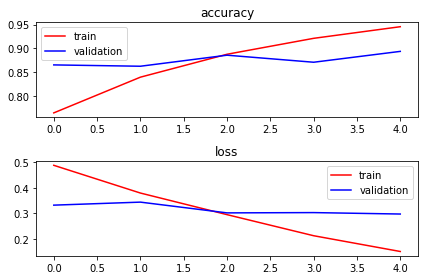

157/157 [==============================] - 10s 63ms/step - loss: 0.2978 - accuracy: 0.8936
Test loss: 0.298, accuracy: 0.894


In [35]:
# plot loss function
plt.subplot(211)
plt.title("accuracy")
plt.plot(history.history["accuracy"], color="r", label="train")
plt.plot(history.history["val_accuracy"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

# evaluate model
score = model.evaluate(Xtest, Ytest, verbose=1)
print("Test loss: {:.3f}, accuracy: {:.3f}".format(score[0], score[1]))


##精确度、召回率、f1分数

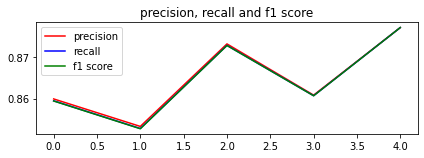

In [36]:
# plot loss function
plt.subplot(211)
plt.title("precision, recall and f1 score")
plt.plot(myMetrics.val_precisions, color="r", label="precision")
plt.plot(myMetrics.val_recalls, color="b", label="recall")
plt.plot(myMetrics.val_f1s, color="g", label="f1 score")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

##混淆矩阵

In [37]:
classes=['positive', 'negtive']
filename1 = "LSTM_confusion_matrix_1.jpg"
filename2 = "LSTM_confusion_matrix_2.jpg"

— val_f1: 0.877240 — val_precision: 0.877240 — val_recall 0.877240


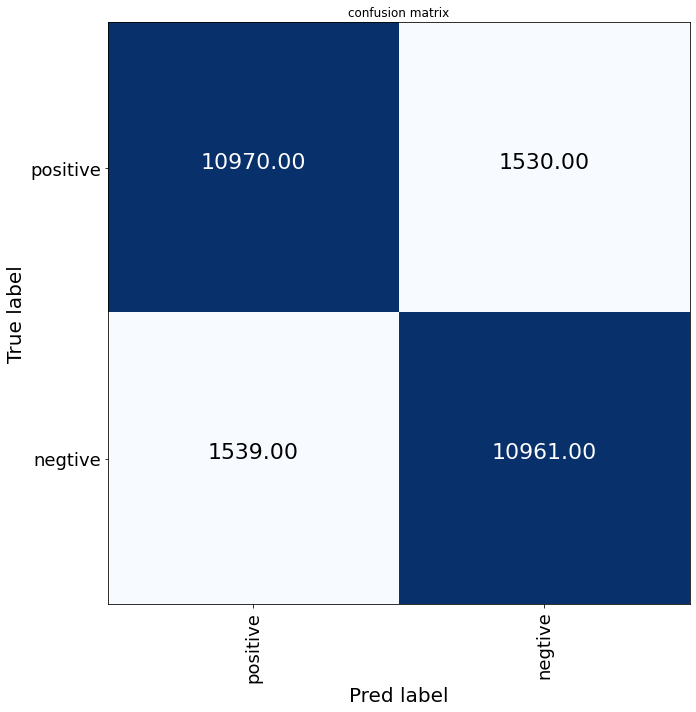

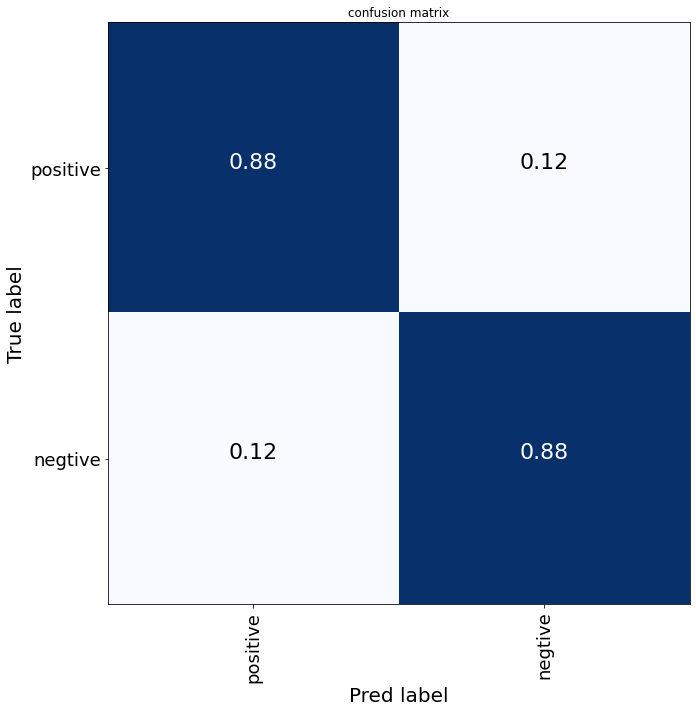

In [38]:
from sklearn.metrics import confusion_matrix

data_num = len(X_Test) ## 等于所有数据 / batchsize，所以所有数据需要能够整除
val_pred = model.predict(X_Test)    #验证集正确
val_true = Y_Test
val_pred_flat = np.zeros(data_num)    #验证集预测
val_true_flat = np.zeros(data_num)    #验证集正确
for data_count in range(data_num):
    val_pred_flat[data_count] = np.argmax(val_pred[data_count])
    val_true_flat[data_count] = np.argmax(Y_Test[data_count])

val_f1 = f1_score(val_true_flat, val_pred_flat, average='macro')  #3个数值
val_recall = recall_score(val_true_flat, val_pred_flat, average='macro')  #3个数值
val_precision = precision_score(val_true_flat, val_pred_flat, average='macro')  #3个数值
print('— val_f1: %f — val_precision: %f — val_recall %f' %(val_f1, val_precision, val_recall))

conf_matrix_1 = [[0,0],[0,0]]
tn, fp, fn, tp = confusion_matrix(val_true_flat, val_pred_flat).ravel()
conf_matrix_1[0][0] = tp.item()
conf_matrix_1[0][1] = fn.item()
conf_matrix_1[1][0] = fp.item()
conf_matrix_1[1][1] = tn.item()
conf_matrix_1 = np.asarray(conf_matrix_1)
paintConfusionMatrix(conf_matrix_1, classes, filename1)
conf_matrix_2 = [[0,0],[0,0]]
nn, npp, pn, pp = 0, 0, 0, 0
n_num, p_num = 0, 0
for data_count in range(data_num):
    if val_pred_flat[data_count] == 0 and val_true_flat[data_count] == 0:
      nn += 1
      n_num += 1
    elif val_pred_flat[data_count] == 0 and val_true_flat[data_count] == 1:
      npp += 1
      n_num += 1
    elif val_pred_flat[data_count] == 1 and val_true_flat[data_count] == 0:
      pn += 1
      p_num += 1
    elif val_pred_flat[data_count] == 1 and val_true_flat[data_count] == 1:
      pp += 1
      p_num += 1
nn, npp, pn, pp = nn / n_num, npp / n_num, pn / p_num, pp / p_num
#pdb.set_trace()
conf_matrix_2[0][0] = pp
conf_matrix_2[0][1] = pn
conf_matrix_2[1][0] = npp
conf_matrix_2[1][1] = nn
conf_matrix_2 = np.asarray(conf_matrix_2)
paintConfusionMatrix(conf_matrix_2, classes, filename2)

In [39]:
model.save('model3.h5')  